#### Inciso 2

Consideramos de nuevo la imagen rice.jpg. Hacer lo siguiente:
- - -

#### Incisos a realizar.

1. Binarizar la imagen mediante el método de Otsu, o usando algún otro método no local.
2. Aplicar operaciones morfológicas adecuadas para limpiar el ruido de la binarización. Explicar por qué está eligiendo estas
transformaciones morfológicas.
3. Aplicar un algoritmo de componentes conexas sobre la binarización y contar cuántos granos de arroz hay en la imagen.



Umbral de Otsu: 131


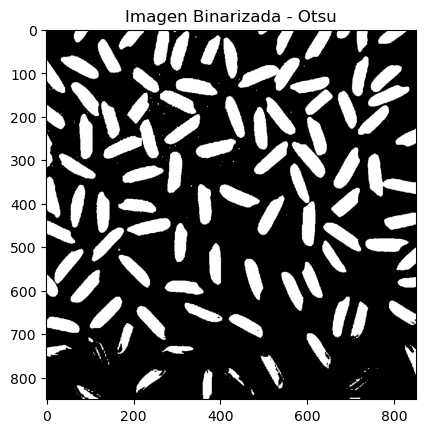

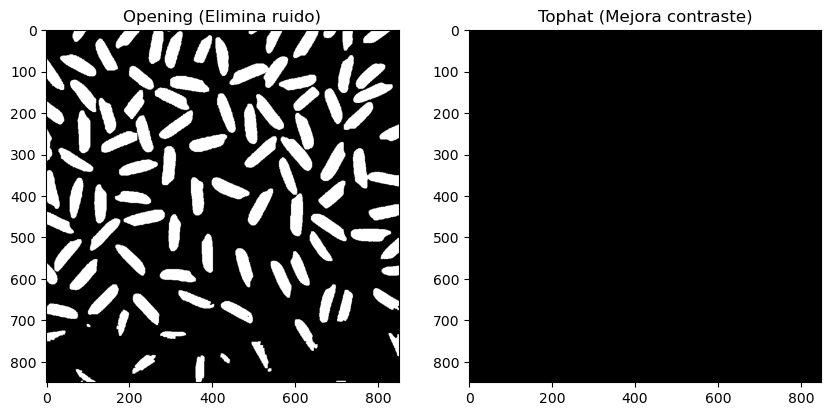

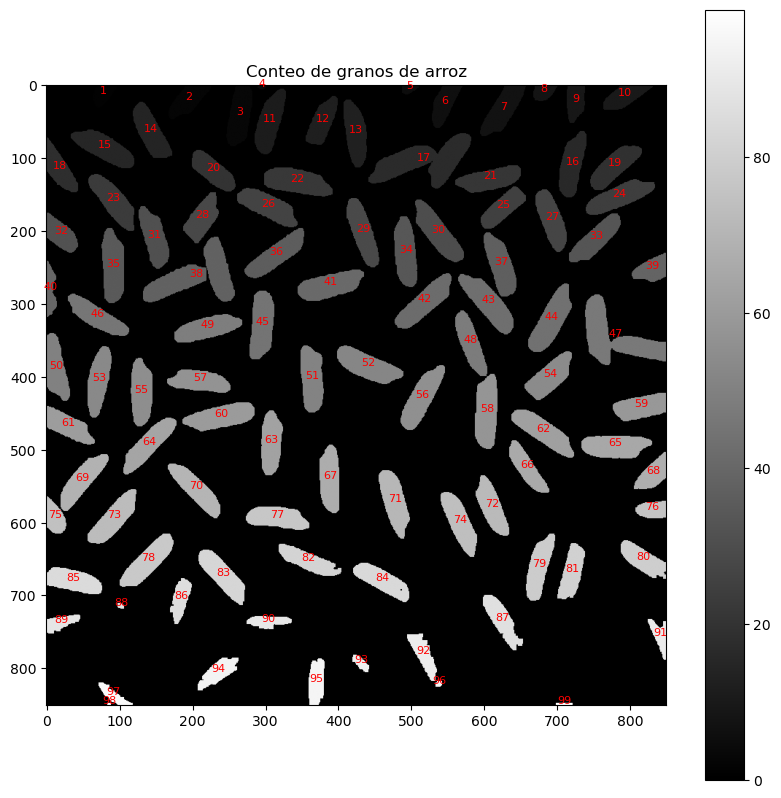

Cantidad de granos de arroz detectados: 99


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
import cv2 as cv

# Cargar la imagen en escala de grises
rice = plt.imread('Images/rice.jpg')
rice_gray = ski.color.rgb2gray(rice[:,:,:3])

# Convertir la imagen a 8 bits
rice_gray = (rice_gray * 255).astype(np.uint8)

# Obtener el umbral de Otsu
otsu_thresh = threshold_otsu(rice_gray)
print("Umbral de Otsu:", otsu_thresh)

# Binarizar la imagen con el umbral de Otsu
rice_binary = (rice_gray >= otsu_thresh).astype(np.uint8) * 255

# Mostrar la imagen binarizada
plt.figure()
plt.title("Imagen Binarizada - Otsu")
plt.imshow(rice_binary, cmap='gray')
plt.show()

# Aplicar operaciones morfológicas para eliminar ruido
kernel = np.ones((5, 5), np.uint8)
rice_cleaned = cv.morphologyEx(rice_binary, cv.MORPH_OPEN, kernel)  # Elimina ruido pequeño
tophat = cv.morphologyEx(rice_cleaned, cv.MORPH_TOPHAT, kernel)  # Mejora el contraste de los objetos

# Mostrar el resultado de las operaciones morfológicas
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Opening (Elimina ruido)")
plt.imshow(rice_cleaned, cmap='gray')
plt.subplot(1,2,2)
plt.title("Tophat (Mejora contraste)")
plt.imshow(tophat, cmap='gray')
plt.show()

# Etiquetar los componentes conectados
labels = label(rice_cleaned, connectivity=2)
regions = regionprops(labels)

# Mostrar la imagen con los granos de arroz etiquetados
plt.figure(figsize=(10,10))
plt.title("Conteo de granos de arroz")
plt.imshow(labels, cmap='gray')
for region in regions:
    centroid = region.centroid
    plt.text(centroid[1], centroid[0], str(region.label), color='red', fontsize=8, ha='center')
plt.colorbar()
plt.show()

# Mostrar el conteo total de granos de arroz
grain_count = len(regions)
print("Cantidad de granos de arroz detectados:", grain_count)
